# Trying simple regression models for sequence models

In [197]:
import pickle

with open("/export/share/krausef99dm/data/ptr_data/ptr_data.pkl", 'rb') as f:
    ordered_dict = pickle.load(f)

In [238]:
sample_targets = ordered_dict[list(ordered_dict.keys())[25]]["targets"]
sample_targets[~np.isnan(sample_targets)]

array([4.363 , 3.26  , 4.16  , 4.83  , 4.368 , 4.341 , 3.841 , 4.67  ,
       5.133 , 4.325 , 4.093 , 4.559 , 3.793 , 3.875 , 4.122 , 4.202 ,
       4.621 , 4.331 , 4.491 , 5.326 , 3.819 , 3.823 , 3.9591, 3.984 ,
       4.152 , 3.799 , 3.5096])

In [67]:
import os
import pandas as pd
import pickle
import torch

from knowledge_db import CODON_MAP_DNA
REVERSE_CODON_MAP_DNA = {v: k for k, v in CODON_MAP_DNA.items()}
REVERSE_CODON_MAP_DNA.update({0: ""})

In [4]:
rna_data = [
torch.tensor([12, 30, 50,  7, 51, 29, 32, 12, 62, 12, 10, 11, 49, 14,  1, 18, 57, 35,
        20, 62, 22, 51, 62, 22, 30, 43, 28,  8, 28, 47, 64, 51,  6, 47, 16,  8,
        12, 51, 47, 51,  7, 25, 62,  2,  8, 43, 21, 63, 46, 49, 47, 48, 32, 16,
        48, 46,  4,  6, 47, 49,  8, 49, 32, 44, 63, 48, 32, 43, 16, 49,  2, 21,
        51,  2, 11, 16,  2, 16, 31, 33, 10, 30, 17, 32, 52, 41, 47, 36,  1, 51,
        47, 33, 63,  6, 46, 39,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], device='cuda:1'),
torch.tensor([12, 22,  2,  6, 46, 21,  2, 26, 26, 23, 64, 25, 34, 51, 64,  6,  8, 58,
        43, 43, 25, 49, 27, 51, 31, 16,  8, 45, 64, 47, 62,  6, 62, 27, 61, 28,
         5, 36, 10, 31, 51, 22, 56,  8, 17, 54,  3, 48, 62, 17, 63,  3, 63,  2,
        19,  8, 50, 36, 24, 28,  9, 21,  3, 40, 33,  3, 18, 60, 49, 57, 21, 49,
        52,  7, 63, 51, 40,  4, 35, 13, 12, 16, 44, 32, 46,  1, 50, 50, 50, 19,
        46, 50, 23, 13, 31, 48, 50, 50, 51, 50, 49, 21, 48, 48, 48, 13, 50, 23,
         9, 27, 50,  1, 59,  1, 16, 23, 21, 48, 46, 19, 34,  4, 51, 33, 12,  2,
        27, 33, 12, 53, 50, 53, 43, 32,  4, 40, 25, 48, 23, 51, 48, 51, 48, 19,
        48, 49, 36, 48, 63, 50, 50, 35, 48, 16, 50, 33, 40, 50, 42, 63, 43, 64,
        49, 10, 23, 29,  1, 36, 28, 35, 50, 50, 63,  3, 18, 40,  7, 29, 33, 50,
        62, 42, 32, 29,  8, 51, 59,  3, 50, 63, 12,  5, 17, 43, 17, 16, 22, 22,
        43, 35, 44, 12, 31, 64, 14, 60, 29, 50, 48, 19, 11, 59, 48, 35, 50, 48,
        64, 12, 51, 16, 48, 28, 29, 25, 29, 13, 31, 63, 43,  1, 51, 48, 33, 48,
        13, 48, 41, 39,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], device='cuda:1'),
    
torch.tensor([12, 34, 34, 26, 47, 64, 22,  6, 54, 16, 60, 28, 42,  8, 64,  6, 26, 26,
         8,  8,  8,  8, 28, 12, 32,  4, 32, 63, 61, 20, 64, 28, 31, 20, 31, 50,
        33,  1, 49, 20, 14,  4, 61, 48, 30, 34, 17, 53, 41, 58, 32, 52, 43,  4,
        28, 36, 24,  4, 41, 28, 36, 23, 47, 50, 51, 51,  4, 36, 33, 52, 43, 59,
        61, 53, 60,  8,  1, 19,  9, 52, 43,  1, 16, 48, 48, 63,  9, 49,  3, 44,
        57, 27, 46,  4, 50, 52, 50, 17, 33, 52, 29, 50, 33, 35, 18, 42, 17, 48,
        51, 42, 35, 31, 53, 40,  5, 61, 53, 43, 44, 43,  8, 25,  2, 31, 50,  8,
        59, 42, 50, 42,  5, 12, 18,  8, 12, 25, 46, 12, 41,  7,  6,  1, 23,  7,
        27,  8, 16, 60, 19,  2, 54, 21, 49, 12, 12, 49, 18, 33, 43, 22,  2, 11,
        28, 17, 19, 54, 27,  1, 35,  5, 42, 32, 48, 49, 63, 46, 11, 13, 11,  2,
        43, 17, 47, 25, 50, 10, 43, 36, 33, 25, 40,  4, 51, 43, 51, 23, 29, 44,
         4, 59, 50, 19, 17,  7, 22, 46, 12, 18, 35,  8, 42, 12, 59, 44, 19, 42,
        34, 41, 60, 44,  1,  5, 50, 48, 63, 50, 21, 48, 62,  1,  3, 59, 53,  6,
        17,  5, 45, 17, 64, 54,  9,  3, 27, 29, 27,  5, 14,  6, 20, 16, 12, 15,
         4,  5, 54,  9, 52, 52, 33, 27, 13, 31, 29, 31, 16, 51, 43, 35, 13, 24,
        17, 51, 47,  8, 21, 10, 35, 61, 49,  4, 51,  1, 12, 44, 50, 42, 47,  7,
        45, 59, 35, 25, 31, 17, 17,  5, 16, 13, 13, 59, 17, 46, 27, 50, 48, 40,
        50, 50, 33, 64, 23,  7, 23, 29, 46, 16, 44,  5, 31, 40, 17, 50,  9, 37,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], device='cuda:1'),
    torch.tensor([12, 20,  2, 59,  1, 62, 42, 40,  6, 10, 47, 24, 17, 15, 16,  1,  6, 46,
        29, 50,  8, 18,  2, 31,  5, 16, 44, 60, 46, 23, 16, 15, 25, 63, 40, 14,
         5, 16, 53, 26,  8, 58, 25, 16, 51, 56,  2, 40, 49,  8, 55, 23, 48, 50,
        16, 32, 48,  4,  1, 43, 30, 28, 43, 59, 14, 64, 29, 16, 16, 50, 46, 40,
         2, 40, 64, 28, 17,  6, 28,  1, 18, 12, 43, 48, 62, 24, 50, 32, 63, 43,
        27, 16, 47, 41, 13, 41, 14, 40, 13,  5, 24, 60, 47, 31, 63, 49,  1, 41,
        60, 44, 49, 22, 10, 35, 51, 51,  6, 43, 46, 40, 49, 47, 51, 49,  1, 23,
        32, 17, 54, 59, 19, 51, 51, 50, 12, 33, 33, 50, 32, 33, 31,  8, 58, 14,
        36,  1, 43, 39,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], device='cuda:1'),
    torch.tensor([12, 17, 31,  8, 30, 23, 26, 28, 48, 12, 25, 28, 24, 28, 27, 49, 47, 10,
        29, 43, 31, 32, 12, 51, 28, 10, 36,  5, 53, 46,  2, 57, 16, 18, 12, 48,
        63, 50, 54,  6, 53,  8, 57, 51,  8, 48, 49, 10, 19,  5, 29, 23, 49, 25,
        51, 23, 28, 40, 50, 48, 23, 44, 35,  6, 12, 31, 44, 50, 56, 12, 45,  6,
        12, 45, 12, 32, 47,  8, 21, 10, 47, 62,  4,  9, 50, 19, 31,  8, 45,  8,
        64, 60, 27,  5, 49, 17, 49, 35, 33, 23,  6, 43, 42,  2,  1, 16, 16, 12,
        51, 41, 52,  8, 46, 40, 62,  4, 46, 31, 46, 46, 27,  1,  6, 63, 42, 44,
        46, 18,  2, 54, 64, 23,  7, 50,  8, 15, 50, 47,  5, 13, 25, 50, 32, 33,
        51, 11, 29, 33, 21, 13, 46, 48,  5, 25, 63,  5, 47, 29, 25, 15, 61, 59,
        63, 59, 32, 54,  5, 55,  4, 33,  3, 12, 42, 47, 46,  5, 19, 50, 35, 12,
        46, 31,  4, 10, 44, 47, 46, 50,  5,  6, 21, 50,  2, 36, 50, 24, 44, 32,
         6, 12, 12, 50, 50, 50, 63, 32, 11,  9, 31, 61,  8,  4, 16, 61,  8, 44,
        14,  9, 48, 32, 44,  2, 52, 12, 46, 63, 50, 49,  4, 49, 17, 43, 13, 63,
        13, 11, 48,  1, 19, 12, 35,  6, 47, 49, 64, 45, 22, 21, 46, 61, 27, 50,
        63, 49, 61, 43,  9, 27, 33,  9,  8, 49, 43, 47, 45, 35, 15, 50, 50,  8,
        45, 59, 40,  4, 44, 31, 27, 15, 45, 45,  5, 43, 33, 46, 15, 48, 33,  3,
        50, 46, 18, 45, 27, 46,  8, 29, 51, 51,  5, 33, 13, 33, 45, 45, 60, 10,
         9, 28,  3, 42, 50, 50, 12, 50, 57, 13, 46, 51, 50, 21, 18, 36, 11,  8,
        50, 18, 44, 58, 47, 61, 24, 47, 42, 49, 59, 27, 33, 50, 64, 42, 33,  7,
        21, 50, 33, 59, 47, 40,  3, 46, 50, 51, 29, 42,  3, 57,  4, 48, 13, 51,
        46, 50,  8, 51, 12, 43, 10, 22, 12, 60, 43, 51, 12, 50,  4, 31, 12, 47,
        12,  8, 51, 47, 48, 14, 52, 51, 47, 43, 48, 32,  8, 15, 17,  5, 58, 43,
        43,  8, 48, 49,  6, 59, 31,  6, 47, 40, 50,  5, 32,  1, 47,  8, 43, 21,
        19, 49,  3, 63, 15, 46, 43, 46, 21, 50,  7, 45, 21, 56,  4, 50, 51, 47,
        27, 44, 43, 12, 31, 31, 28,  9, 46, 42,  5, 50, 42, 59,  4, 56, 43, 31,
        51, 57, 22, 56, 42, 17, 31, 51,  4, 49, 45, 58,  6,  2, 46, 43, 49,  1,
        63, 49, 47, 10, 45, 21,  8, 43,  8, 50, 14, 51, 51,  6, 28, 60, 43, 58,
        45, 43,  5, 51,  3, 50,  7, 46, 43, 50, 46, 50, 59, 59,  3, 42, 45, 49,
        60, 22, 10, 25, 63, 60, 61, 18, 43, 47, 19, 50, 18, 47, 12, 48, 64, 47,
        41, 46, 12, 42, 51, 50, 44, 13, 46,  7, 46, 47, 24,  8, 50, 50, 22, 41,
        60,  8, 42, 24, 41, 23, 12, 48, 50, 43, 48, 43,  8,  8,  6, 17, 50, 47,
        25, 43,  4, 52, 43,  7, 53, 43, 50, 49, 62, 22,  7, 29, 47, 44, 16, 52,
        47, 45, 53, 22, 63, 28,  2, 52, 48, 32, 52, 19, 29, 44, 50,  8, 23,  5,
        23, 19, 21, 10, 47,  5, 51, 57, 13, 53, 44, 24, 52, 41, 47, 40,  8, 12,
        47, 42, 35, 17, 28, 22, 25, 19, 37,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], device='cuda:1')
    
]

In [108]:
torch.bincount(rna_data[2], minlength=65)[1:65]

tensor([ 8,  4,  3, 10,  9,  5,  5, 12,  5,  2,  3, 11,  5,  2,  1,  7, 13,  4,
         5,  4,  3,  3,  5,  2,  5,  3,  7,  6,  5,  1,  8,  4,  8,  4,  7,  4,
         1,  0,  0,  4,  4,  9, 10,  7,  2,  6,  5,  8,  6, 16,  8,  7,  5,  5,
         0,  0,  1,  1,  7,  4,  5,  1,  4,  5], device='cuda:1')

In [90]:
rna_data[0]

tensor([12, 30, 50,  7, 51, 29, 32, 12, 62, 12, 10, 11, 49, 14,  1, 18, 57, 35,
        20, 62, 22, 51, 62, 22, 30, 43, 28,  8, 28, 47, 64, 51,  6, 47, 16,  8,
        12, 51, 47, 51,  7, 25, 62,  2,  8, 43, 21, 63, 46, 49, 47, 48, 32, 16,
        48, 46,  4,  6, 47, 49,  8, 49, 32, 44, 63, 48, 32, 43, 16, 49,  2, 21,
        51,  2, 11, 16,  2, 16, 31, 33, 10, 30, 17, 32, 52, 41, 47, 36,  1, 51,
        47, 33, 63,  6, 46, 39,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0, 

In [50]:
rna_data_lists = [ls.tolist() for ls in rna_data]
rna_data_base = [''.join(REVERSE_CODON_MAP_DNA[codon] for codon in encoded_dna) for encoded_dna in rna_data_lists]

In [59]:
tissue_ids = torch.tensor([ 3, 26,  4, 23,  0, 25, 13, 16, 16,  4, 10, 28, 11,  5, 28, 24],
       device='cuda:1')
tissue_ids = tissue_ids.tolist()[:len(rna_data_base)]

In [60]:
seq_len = torch.tensor([ 96, 238, 324, 148, 621, 757, 857, 214, 343, 268, 481, 410, 307, 375,
        346, 350], device='cuda:1')
seq_len = seq_len.tolist()[:len(rna_data_base)]

In [61]:
targets = torch.tensor([6.5370, 5.0270, 2.7470, 5.9470, 5.4820, 5.4460, 4.2460, 4.9940, 4.8880,
        4.3590, 6.1870, 6.4934, 6.1070, 4.8720, 2.7996, 3.8572],
       device='cuda:1', dtype=torch.float64)
targets = targets.tolist()[:len(rna_data_base)]

#### Sanity check: Seq lengths

In [63]:
for seq, length in zip(rna_data_base, seq_len):
    print(len(seq), length*3)

288 288
714 714
972 972
444 444
1863 1863


#### Sanity check for targets

In [68]:
# Load ground truth data
ptr_data_path = "/export/share/krausef99dm/data/ptr_data/ptr_data.pkl"

# load pickle file
with open(os.path.join(ptr_data_path), 'rb') as f:
    raw_data = pickle.load(f)

In [88]:
for identifier, content in raw_data.items():
    #print(identifier)
    #print(content)

    sequence = content['fasta']
    bed_annotation = content['bed_annotation']

    coding_sequence = [nucleotide for nucleotide, annotation in zip(list(sequence), bed_annotation) if
                           annotation not in [5, 3]]
    coding_sequence_str = "".join(coding_sequence)

    for idx, test_sequence in enumerate(rna_data_base):
        if coding_sequence_str == test_sequence:
            target_test = targets[idx]
            tissue_id = tissue_ids[idx]
            target_true = content["targets"][tissue_id]
            print(identifier, target_test == target_true)
            print(target_test, target_true)
            
    #break

ENST00000528364
5.027 5.027
True
ENST00000492590
5.947 5.947
True
ENST00000381006
5.482 5.482
True
ENST00000296370
6.537 6.537
True
ENST00000234831
2.747 2.747
True


In [65]:
for seq, tissue_id, target in zip(rna_data_base, tissue_ids, targets):
    print(seq)
    print(tissue_id, "->", target)
    print("#####")

ATGACGGAACTAGAGACAGCCATGGGCATGATCATAGACGTCTTTTCCCGATATTCGGGCAGCGAGGGCAGCACGCAGACCCTGACCAAGGGGGAGCTCAAGGTGCTGATGGAGAAGGAGCTACCAGGCTTCCTGCAGAGTGGAAAAGACAAGGATGCCGTGGATAAATTGCTCAAGGACCTGGACGCCAATGGAGATGCCCAGGTGGACTTCAGTGAGTTCATAGTGTTCGTGGCTGCAATCACGTCTGCCTGTCACAAGTACTTTGAGAAGGCAGGACTCAAATGA
3 -> 6.537
#####
ATGAGCTTCCTCAAAAGTTTCCCGCCGCCTGGGCCAGCGGAGGGGCTCCTGCGGCAGCAGCCAGACACTGAGGCTGTGCTGAACGGGAAGGGCCTCGGCACTGGTACCCTTTACATCGCTGAGAGCCGCCTGTCTTGGTTAGATGGCTCTGGATTAGGATTCTCACTGGAATACCCCACCATTAGTTTACATGCATTATCCAGGGACCGAAGTGACTGTCTAGGAGAGCATTTGTATGTTATGGTGAATGCCAAATTTGAAGAAGAATCAAAAGAACCTGTTGCTGATGAAGAAGAGGAAGACAGTGATGATGATGTTGAACCTATTACTGAATTTAGATTTGTGCCTAGTGATAAATCAGCGTTGGAGGCAATGTTCACTGCAATGTGCGAATGCCAGGCCTTGCATCCAGATCCTGAGGATGAGGATTCAGATGACTACGATGGAGAAGAATATGATGTGGAAGCACATGAACAAGGACAGGGGGACATCCCTACATTTTACACCTATGAAGAAGGATTATCCCATCTAACAGCAGAAGGCCAAGCCACACTGGAGAGATTAGAAGGAATGCTTTCTCAGTCTGTGAGCAGCCAGTATAATATGGCTGGGGTCAGGACAGAAGATTCAATAAGAGATTATGAAGATGGGATGGAGGTGGATACCACACCAACAGTTGCTGGACAGTTTGAGG

In [182]:
import os
import pickle
import torch
import numpy as np
import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, root_mean_squared_error

from knowledge_db import TISSUES, CODON_MAP_DNA
from data_handling.train_val_test_indices import get_train_val_test_indices

random_state = 2024

In [3]:
with open("/export/share/krausef99dm/data/data_train/codon_train_2.7k_data.pkl", 'rb') as f:
    rna_data_full, tissue_ids_full, targets_full = pickle.load(f)

In [81]:
mrna_sequences = ["".join(map(str, tensor.tolist())) for tensor in rna_data_full]  # FIXME: mrna sequence length is now not fully identical with the original sequence length

train_indices, val_indices, _ = get_train_val_test_indices(mrna_sequences, val_frac=0.15, test_frac=0,
                                                           random_state=random_state)




LOG: Counts per bin: (array([ 366,  807,  873, 1077,  946,  760,  569,  467,  369,  222]), array([  77. ,  239.3,  401.6,  563.9,  726.2,  888.5, 1050.8, 1213.1,
       1375.4, 1537.7, 1700. ]))


In [183]:
# Classic train test split
train_indices, val_indices = train_test_split(np.arange(len(mrna_sequences)), test_size=0.15, random_state=random_state)

In [184]:
tissue_id = 12

In [185]:
# VALIDATION
rna_data_val = [rna_data_full[i] for i in val_indices]
tissue_ids_val = tissue_ids_full[val_indices]
targets_val = targets_full[val_indices]

# only keep data for tissue_id == 12
tissue_id_12_indices = np.where(tissue_ids_val == tissue_id)[0]
rna_data_12_val = [rna_data_val[i] for i in tissue_id_12_indices]
tissue_ids_12_val = tissue_ids_val[tissue_id_12_indices]
targets_12_val = targets_val[tissue_id_12_indices]

len(targets_12_val)

616

In [186]:
# TRAIN
rna_data_train = [rna_data_full[i] for i in train_indices]
tissue_ids_train = tissue_ids_full[train_indices]
targets_train = targets_full[train_indices]

# only keep data for tissue_id == 12
tissue_id_12_indices = np.where(tissue_ids_train == tissue_id)[0]
rna_data_12_train = [rna_data_train[i] for i in tissue_id_12_indices]
tissue_ids_12_train = tissue_ids_train[tissue_id_12_indices]
targets_12_train = targets_train[tissue_id_12_indices]

len(targets_12_train)

3726

In [187]:
def _compute_frequencies(rna_data):
    freqs = []
    for rna in rna_data:
        counts = torch.bincount(rna, minlength=len(CODON_MAP_DNA)+1)[1:len(CODON_MAP_DNA)+1]
        freq = counts.float() / counts.sum()
        freqs.append(freq)
    return torch.stack(freqs)

In [188]:
x_train = _compute_frequencies(rna_data_12_train).tolist()
x_test = _compute_frequencies(rna_data_12_val).tolist()

In [171]:
# Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) # TODO
x_test = scaler.transform(x_test)

In [134]:
# Use full data for training
#x_train = _compute_frequencies(rna_data_full).tolist()
#targets_12_train = targets_full.tolist()

In [189]:
def evaluate(model, x_test, y_test):
    y_pred = model.predict(x_test)
    print("r2:  ", r2_score(y_pred, y_test))
    print("RMSE:", root_mean_squared_error(y_pred, y_test))

In [192]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=2000, tol=0.1)
regr.fit(x_train, targets_12_train)

evaluate(regr, x_test, targets_12_val)

r2:   -1579.3296454960694
RMSE: 0.8632271201642024


In [172]:
from sklearn.dummy import DummyRegressor

regr = DummyRegressor(strategy="mean").fit(x_train, targets_12_train)

evaluate(regr, x_test, targets_12_val)

r2:   -8.903021968048287e+29
RMSE: 0.8380480874578216


In [173]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression().fit(x_train, targets_12_train)

evaluate(regr, x_test, targets_12_val)

r2:   -3.224518634519561
RMSE: 0.779168451116159


In [174]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=2000, tol=0.1)
regr.fit(x_train, targets_12_train)

evaluate(regr, x_test, targets_12_val)

r2:   -0.5135115141870086
RMSE: 1.1447088011321889


In [175]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=3, random_state=random_state)
regr.fit(x_train, targets_12_train)

evaluate(regr, x_test, targets_12_val)

r2:   -23.687099377538676
RMSE: 0.8112466864754497


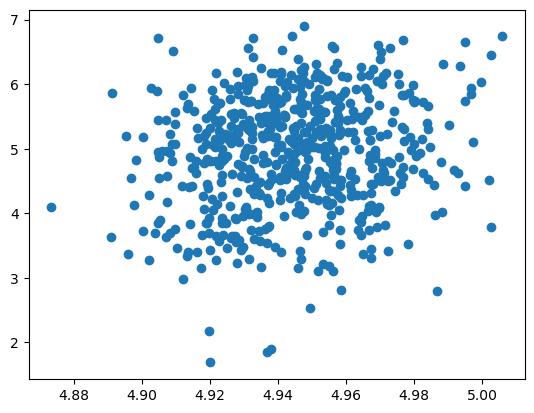

In [193]:
plt.scatter(regr.predict(x_test), targets_12_val)